# Wahlomat - Datenanalyse

In [1]:
# importe 
import numpy as np 
import matplotlib.pyplot as plt 
from graph_tool.all import *

In [2]:
# euklidian distance in 38d-space
def calc_euklidian_dist(list1, list2): 
    if len(list1) != len(list2): 
        print("ungleich lange listen, exiting ...")
        return -1
    return np.sqrt( sum([  (list1[i]-list2[i])**2  for i in range(len(list1))] ))


In [3]:
# data (encoded: 1=yes, 2=maybe, 3=no)  
CDU =	[3,1,3,2,2,1,3,2,1,2,3,1,3,1,1,1,2,1,3,3,1,3,3,3,3,2,1,1,3,1,1,3,3,3,1,1,3,3]
links =	[1,3,1,3,1,3,1,3,1,3,1,3,1,3,1,3,1,3,1,1,3,1,1,1,3,1,3,3,1,3,1,1,3,1,1,3,1,1]
SPD =	[1,1,3,3,1,2,3,2,1,3,3,1,1,3,1,3,1,2,3,2,3,2,1,1,3,1,1,1,1,2,1,1,3,1,2,3,1,1]
afd =	[3,1,3,1,3,1,3,1,3,1,3,1,3,1,2,3,3,1,3,3,1,3,3,3,1,1,1,3,3,1,3,3,1,3,3,1,3,3]
gruen =	[1,1,1,3,1,3,1,3,1,3,1,3,1,3,1,2,1,3,3,1,3,1,1,1,3,1,3,1,3,3,1,1,3,1,1,3,1,1] 
NPD =	[3,1,3,1,2,1,1,1,1,1,1,3,3,1,3,3,1,1,2,3,1,3,3,3,1,1,1,3,1,1,3,2,1,1,3,1,3,3]
FDP =	[3,2,3,3,2,2,2,2,3,1,2,3,3,1,1,1,3,1,3,3,1,3,3,2,3,3,1,1,2,1,1,3,3,3,3,3,3,1]
freie =	[3,1,3,1,2,1,3,1,1,1,3,1,3,1,1,3,1,1,1,2,1,3,1,3,2,1,1,3,1,1,1,1,1,1,1,2,3,1]
MUT  =	[1,2,1,3,1,3,3,3,2,3,2,1,1,1,1,3,1,1,1,1,3,1,3,1,3,3,2,3,3,3,2,2,3,1,1,3,1,1]
pirat =	[1,3,1,3,1,3,1,3,1,3,2,3,1,3,1,3,1,3,3,1,3,1,2,1,3,1,1,3,1,1,1,1,3,1,1,3,1,1]
partei=	[1,1,1,3,1,2,1,1,1,3,1,3,1,3,1,3,1,3,1,1,3,1,1,1,3,1,1,3,1,3,1,1,3,1,1,3,1,1]
bueso =	[3,1,3,1,3,2,3,1,3,2,1,2,3,1,2,2,3,1,3,3,3,3,3,3,3,2,1,3,1,2,2,1,1,1,2,1,3,3]
adpm =	[3,1,3,1,1,1,3,1,3,1,1,3,3,1,2,2,1,2,1,3,1,3,3,3,1,3,1,3,1,1,3,3,1,3,3,2,3,3]
blau =	[3,1,3,1,3,2,3,1,3,1,3,2,3,1,2,1,3,1,3,3,1,3,3,3,3,3,1,3,3,1,2,3,1,3,3,3,3,3]
KPD =	[2,1,1,3,1,3,1,3,3,3,1,3,3,3,1,3,3,3,1,1,3,3,1,1,3,1,1,3,1,3,3,1,1,1,1,3,3,3]
oedp =	[1,1,1,3,1,1,1,3,1,3,1,3,1,3,1,1,1,2,3,1,3,1,3,1,3,1,1,3,3,3,3,1,3,1,2,3,1,1]
human =	[1,3,1,3,1,3,3,2,1,2,2,3,1,3,1,3,3,3,1,2,3,3,3,1,3,1,1,3,1,1,1,3,3,1,1,3,2,1]
pdv =	[3,1,3,1,1,3,3,1,3,1,3,3,3,1,2,1,3,1,1,3,2,3,3,1,2,3,1,3,3,1,3,3,3,3,3,3,3,3]
PGF =	[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

parteinames   = ["CDU","links","SPD","afd","gruen","NPD","FDP","freie","MUT","pirat","partei","bueso","adpm","blau","KPD","oedp","human","pdv","PGF"]
# ["cdu","links","spd","afd","gruen","npd","fdp","freie","MUT","pirat","partei","bueso","admp","v-abst.","Bayern","DKP","MLPD","SGP","TSH","TSA","BC","BIG","BGE","DD","DIE","3.Weg","Grauen","Rechte","Violett","liebe","frauen","GP","LKR","MenWelt","SoziLi","oekoli","human.","PFDT","GF","VOLT"]
list_of_lists = [CDU,links,SPD,afd,gruen,NPD,FDP,freie,MUT,pirat,partei,bueso,adpm,blau,KPD,oedp,human,pdv,PGF]
# [cducsu,spd,gruen,links,afd,fdp,freiewaehler,piraten,MUT,NPD,familien,oedp,partei,volksabstimmung,Bayernpartei,DKP,MLPD,SGP,tierschutz_hier,tierschutzallianz,buendnissC,BIG,BGE,DemokratieDirekt,DemokratieInEuropa,dritterweg,grauen,rechte,violette,liebe,frauen,panther,LKR,MenWelt,sozialeliberale,oekolinx,humanisten,ParteiFuerDieTiere,Gesundheitsforschung,VOLT]
N_analyzed_parties  = len(list_of_lists)
print("N_analyzed_parties", N_analyzed_parties)
N_fragen = 38

# calculate euklidian distances:
euklidian_distances = np.zeros((N_analyzed_parties, N_analyzed_parties), dtype=float)
for i in range( N_analyzed_parties ):
    for j in range( N_analyzed_parties ):  
        euklidian_distances[i][j] = calc_euklidian_dist( list_of_lists[i], list_of_lists[j] )

for partei_list in list_of_lists:
    for antwort in range(N_fragen) :
        tmp = [ "J","V","N" ][(partei_list[antwort])-1]
        counter = int(antwort)   + 1 
        partei_list[antwort] = "Q"+str(antwort).zfill(2) + "A" +  tmp

overlap = np.zeros(( N_analyzed_parties ,N_analyzed_parties ), dtype="float")
for i in range( N_analyzed_parties ): 
    for j in range( N_analyzed_parties ):
        overlap[i][j] = round(len(list( set( list_of_lists[i]).intersection(set( list_of_lists[j] )) ))/N_fragen , 4)
print("test overlap", overlap[10])
        


N_analyzed_parties 19
test overlap [0.2105 0.8947 0.6842 0.1579 0.8158 0.3421 0.2632 0.4474 0.6053 0.8158
 1.     0.2895 0.2632 0.1842 0.7105 0.7632 0.6579 0.2632 0.0263]


In [5]:
print("test: SPD[2]:", SPD[2], " --- sollte  Q02AN sein")

test: SPD[2]: Q02AN  --- sollte  Q02AN sein


In [8]:
print("beispielvergleich: spd und cdu")
print("len(list( set(spd).intersection(set(cdu)) ))")
print(round(len(list( set( SPD).intersection(set( CDU)) ))/N_fragen,4)) 

beispielvergleich: spd und cdu
len(list( set(spd).intersection(set(cdu)) ))
0.3684


In [9]:
# graph "diagramm" 
diagramm = graph_tool.Graph()
diagramm.set_directed(False)
# property_maps 
couplings         = diagramm.new_edge_property("float")
couplings_re      = diagramm.new_edge_property("float")
couplings_eukl_38 = diagramm.new_edge_property("float")
couplings_text    = diagramm.new_edge_property("string")
vertex_labels_by_party = diagramm.new_vertex_property("string")          # doubles
couplings = diagramm.new_edge_property("float")

vertices = []
for xx in parteinames: 
    vertices.append(diagramm.add_vertex())


for qq in range(len(parteinames)): 
    vertex_labels_by_party[vertices[qq]] = parteinames[qq]


In [10]:
# fill the property-maps
edge_descriptors = np.zeros((N_analyzed_parties,N_analyzed_parties), dtype=np.dtype(object) )
print("test edge_descriptors [1][1] ", edge_descriptors[1][1])
min_overlap = np.amin(overlap)
for vertex1 in diagramm.vertices(): 
    for vertex2 in diagramm.vertices(): 
        # no self-loops
        if vertex1 != vertex2: 
            index1 = parteinames.index(vertex_labels_by_party[vertex1])
            index2 = parteinames.index(vertex_labels_by_party[vertex2])
            # create edges only for reasonable similar parties
            if overlap[index1][index2] > 0.6: # cutoff 60%
                a = diagramm.add_edge(vertex1, vertex2)
                edge_descriptors[ index1 ][ index2 ] = a
                couplings[a] = overlap[index1][index2]
                couplings_re[a] = overlap[index1][index2] - min_overlap
                couplings_text[a] = str(round(100*overlap[index1][index2],1))+"%"
                couplings_eukl_38[a] = euklidian_distances[index1][index2]
            #print("edge_descriptors[ index1 ][ index2 ]", edge_descriptors[ index1 ][ index2 ])


test edge_descriptors [1][1]  0


In [11]:
# use cool spring-layouting algorithm
positions1 = sfdp_layout(diagramm, K=1000 , C=5, p=5, eweight=couplings)
positions2 = sfdp_layout(diagramm, K=1000 , C=5, p=5, eweight=couplings_eukl_38)

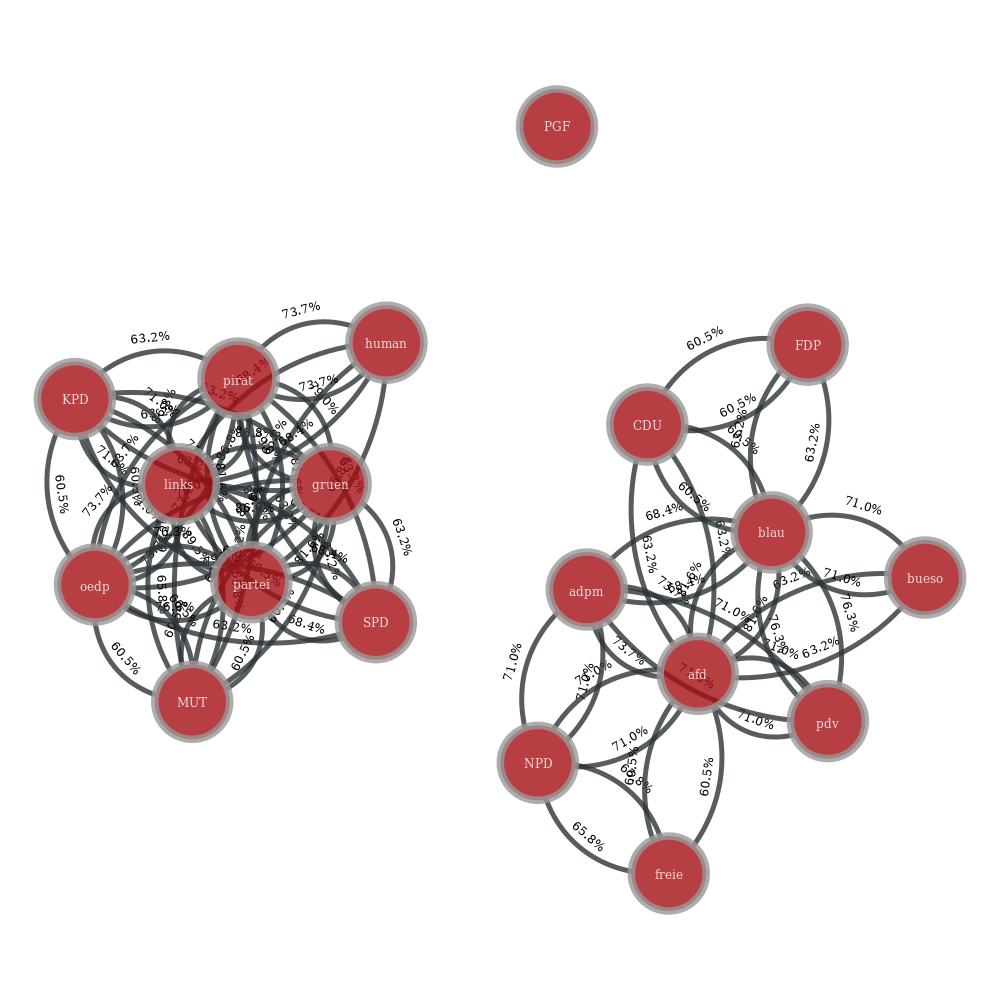

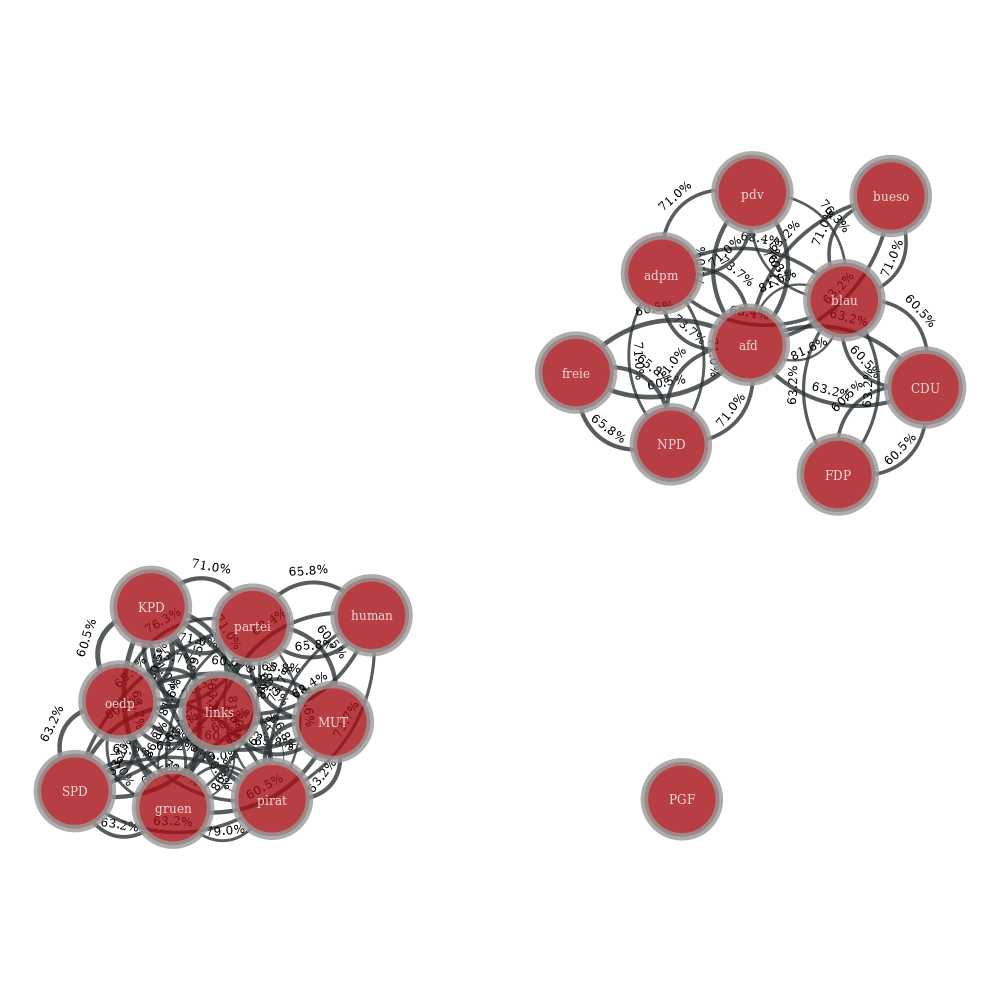

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f3f36310d30, at 0x7f3f36310710>

In [12]:
# plot the whole thing  
graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            output_size=(1000,1000),
            edge_pen_width=prop_to_size(couplings, mi=5),
            pos=positions1,
            edge_text=couplings_text,
            bg_color = [255,255,255,1],
            # output="overlap_eu.png"
            )

graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75,
            output_size=(1000,1000),
            edge_pen_width=prop_to_size(couplings_eukl_38),
            pos=positions2,
            edge_text=couplings_text,
            bg_color = [255,255,255,1],
            # output="euklidian_eu.png"
            )

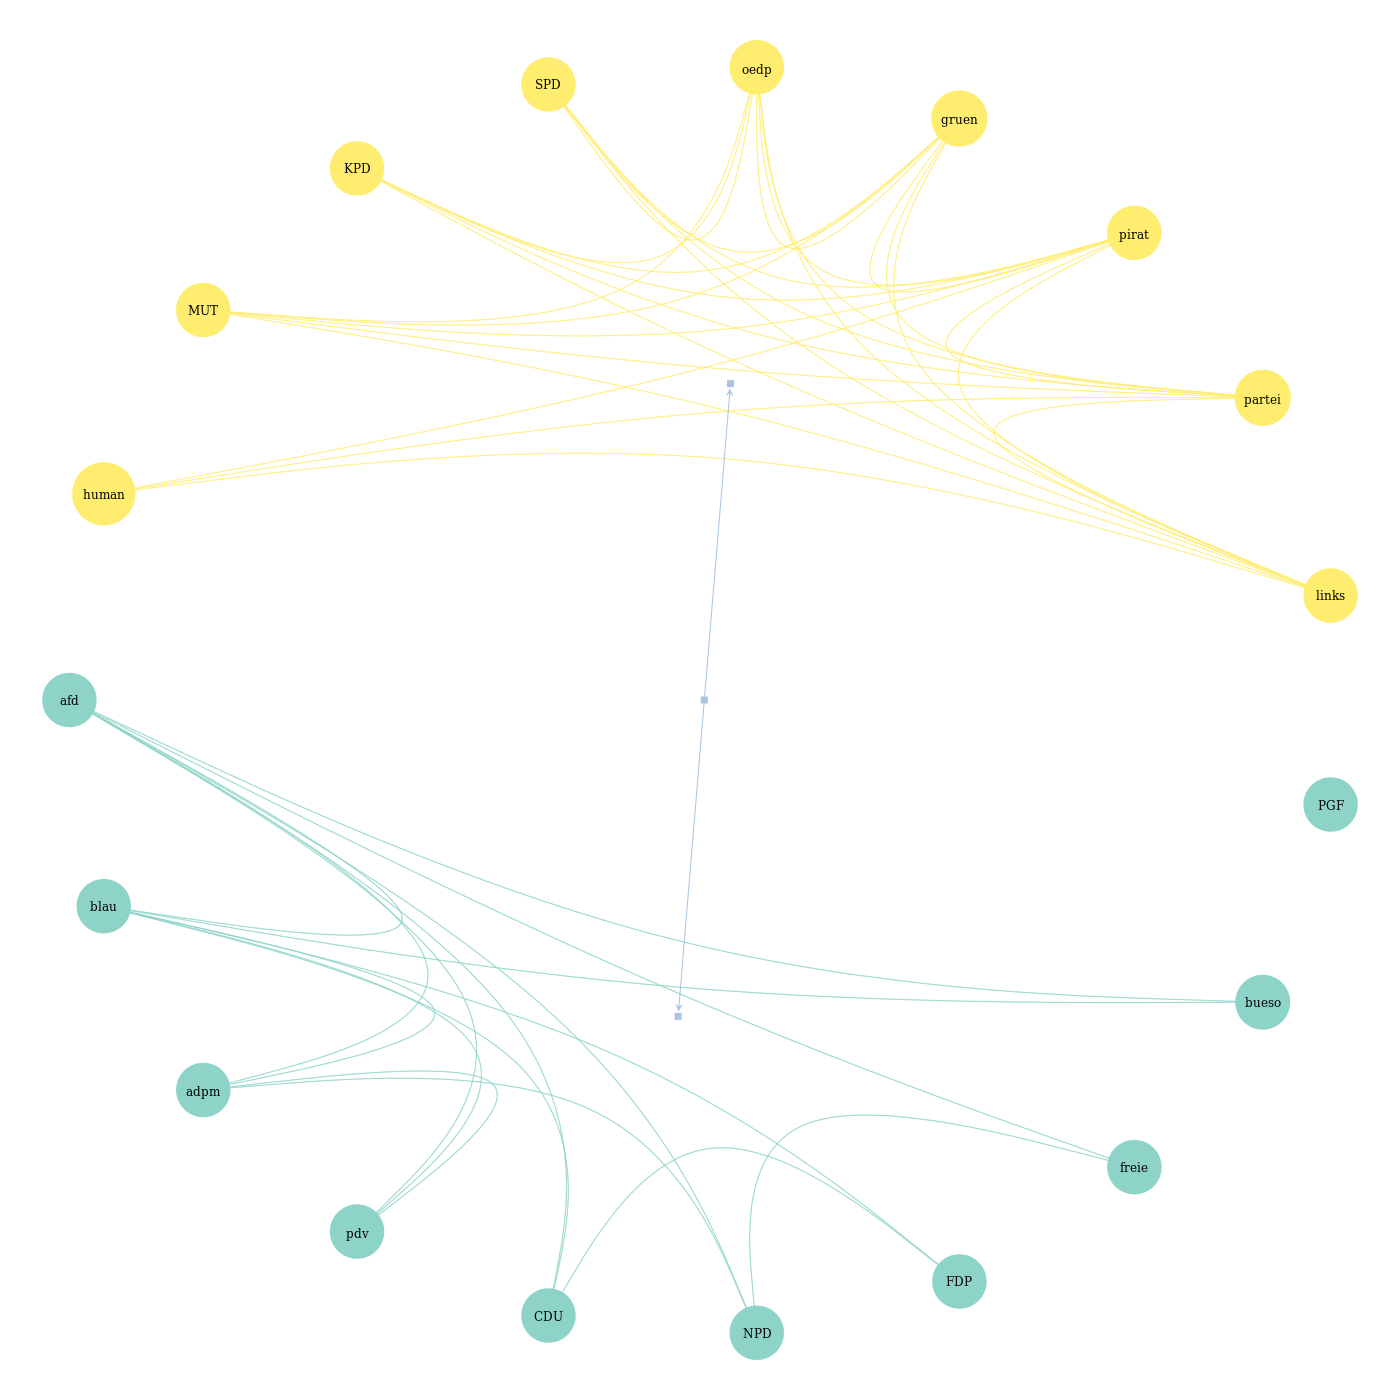

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f3f36310d30, at 0x7f3f36320a58>,
 <Graph object, directed, with 22 vertices and 21 edges at 0x7f3f376dca90>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f3f376dca90, at 0x7f3f3635a1d0>)

In [13]:
# algorithm to find clusters/hierarchy
beta_s = 0.8  # "strength" to be used to investigate clusters
state = minimize_nested_blockmodel_dl(diagramm, deg_corr=True)
draw_hierarchy(state, output="diagramm_nested_model.pdf")
draw_hierarchy(state, output="diagramm_nested_model.png")
draw_hierarchy(state,beta=beta_s, 
                   vertex_text=vertex_labels_by_party, 
                   vertex_size=50 ,
                   output_size=(1400,1400)
)


In [ ]:
# UNDER CONSTRUCTION: Principal Component Analysis (when i have the time)
# short googling yields the following:
# from matplotlib.mlab import PCA
# pca = PCA(np.transpose(data))